<a href="https://colab.research.google.com/github/rodrigofardin/Reconhecimento-de-Padroes/blob/main/RegressaoCaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carregando uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

In [2]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

Features names

In [3]:
print(dataset.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Criando as matrizes de dados X e y

In [5]:
X, y = fetch_california_housing(return_X_y=True)
print(X.shape, y.shape)

(20640, 8) (20640,)


Escolhendo o modelo que será trabalhado

0


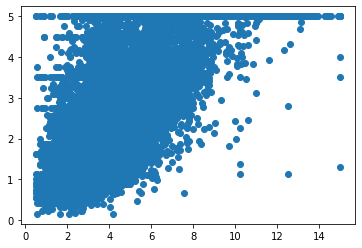

1


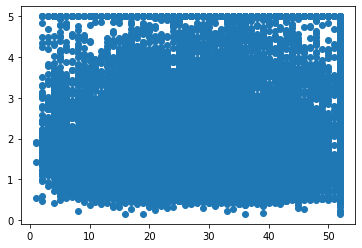

2


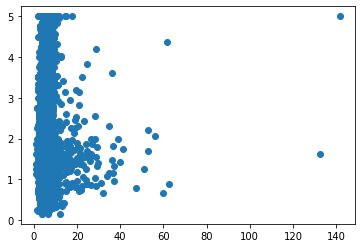

3


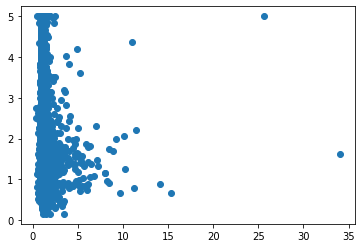

4


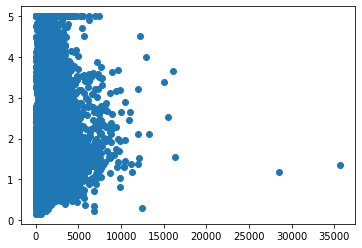

5


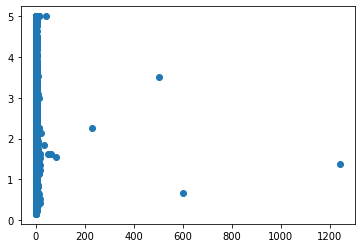

6


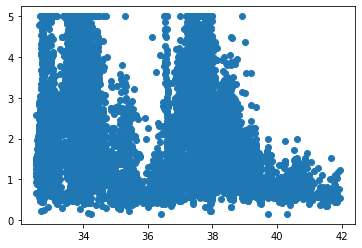

7


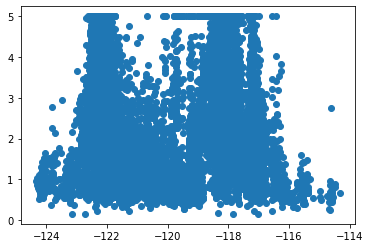

In [6]:
import matplotlib.pylab as plt
for i in range(X.shape[1]):
    print(i)
    plt.scatter(X[:,i], y)
    plt.show()

O primeiro conjunto de dados que foi escolhido

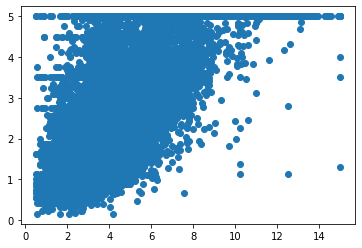

In [7]:
X0 = X[:,0:1]
plt.scatter(X0, y)
plt.show()

**Modelo de Regressão Linear**

Definindo o modelo de regressão

In [8]:
from sklearn import linear_model
modelo = linear_model.LinearRegression()

In [12]:
modelo.fit(X0, y)
ypred = modelo.predict(X0)
ypred.shape

(20640,)


Visualização da reta de regressão linear que o modelo gerou, com os mesmos dados que criaram o modelo.


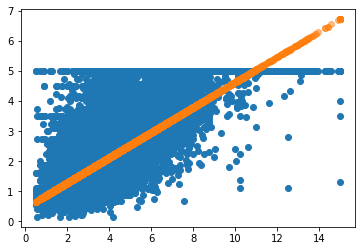

In [14]:
plt.scatter(X0, y)
plt.scatter(X0, ypred, alpha=0.5)

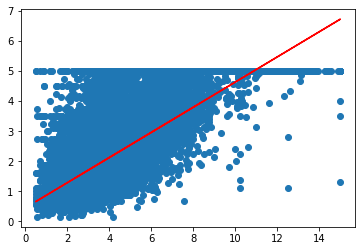

In [15]:
plt.scatter(X0, y)
plt.plot(X0, ypred, 'r')

Calculando o MSE (erro quadrático médio)

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, ypred)
print(mse)

0.7011311502929527


Calculando o MAE (Erro Absoluto Médio)

In [17]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, ypred)
print(mae)

0.6262593379114338


Calculando o RMSE (Raiz Quadrada do Erro Médio)

In [18]:
rmse = mean_squared_error(y, ypred, squared=False)
print(rmse)

0.8373357452616917


Utilizando os atributos coef_ e intercept_ do modelo, sendo eles respectivamente o coeficiente angular e linear de nossa reta

In [19]:
print(modelo.intercept_,'\n', modelo.coef_)

0.45085576703267893 
 [0.41793849]


Plotando um gráfico (2D) do MSE em função do atributo intercept_ da classe LinearRegression. Mantendo os valores do atributo coef_ fixos e variando o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

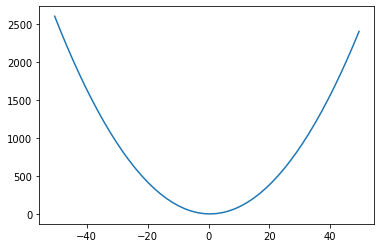

In [25]:
import numpy as np

def plot(delta):
  erros = []
  intercept = modelo.intercept_
  ws = np.linspace(intercept-delta, intercept+delta)
  for w in ws:
    modelo.intercept_= w
    ypred = modelo.predict(X0)
    erro = mean_squared_error(y, ypred)
    erros.append(erro)
  modelo.intercept_ = intercept
  plt.plot(ws, erros)
  plt.show()

plot(50)